In [1]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt
import copy

269
Saving image to: image_processed\moon_filtered.png


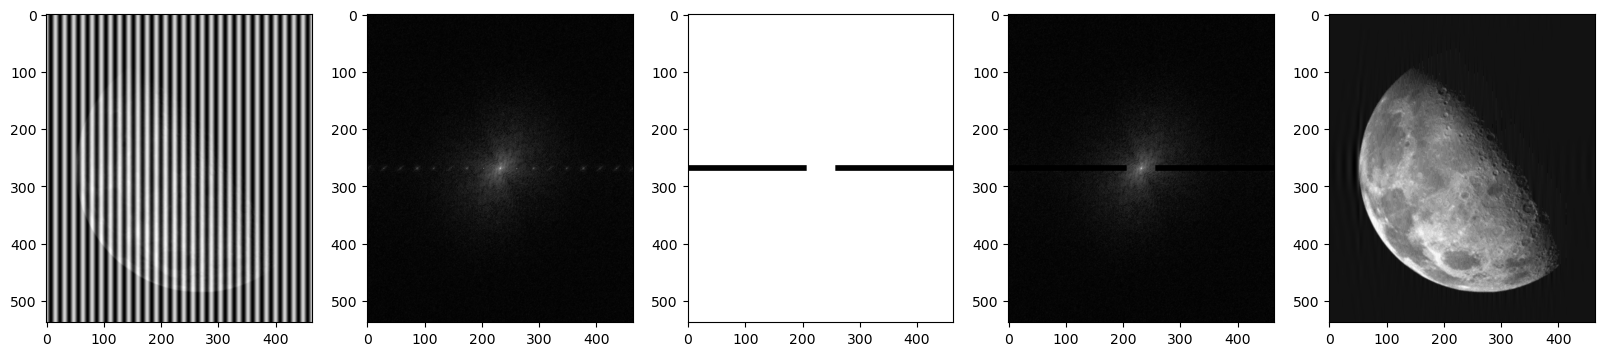

In [2]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    height_im = len(im)
    width_im = len(im[0])
    
    # Zero padd input image
    new_height_im = 1*height_im
    new_width_im = 1*width_im
    temp = np.zeros([new_height_im, new_width_im])
    for row in range(height_im):
        for col in range(width_im):
            temp[row][col] = im[row][col]
    im_fft = np.fft.fftshift(np.fft.fft2(temp))
    temp2 = copy.deepcopy(im_fft)


    maximum = np.array(im_fft[:,0]).argmax()
    print(maximum)

    im_filtered = im

    blocker_size = 10
    nonblocker_length = 50
    allpass_filter = np.ones([new_height_im, new_width_im])
    
    # Block horizontal
    frequency_blocker_horizontal = np.zeros([blocker_size,new_width_im])
    one_window = np.ones([blocker_size, nonblocker_length])
    frequency_blocker_horizontal[:,int(new_width_im/2-nonblocker_length/2):int(new_width_im/2+nonblocker_length/2)] = one_window

    # Block vertical
    frequency_blocker_vertical = np.zeros([new_height_im,blocker_size])
    one_window = np.transpose(one_window)
    allpass_filter[int(new_height_im/2-blocker_size/2):int(new_height_im/2+blocker_size/2),:] = frequency_blocker_horizontal

    # Kernel and image multiplication
    for row in range(new_height_im):
        for col in range(new_width_im):
            im_fft[row][col] *= allpass_filter[row][col]

    conv_result = (np.abs(np.fft.ifft2(im_fft)))[:height_im,:width_im]

    plt.figure(figsize=(20, 4))
    plt.subplot(1, 5, 1)
    plt.imshow(temp, cmap="gray")
    
    plt.subplot(1, 5, 2) 
    plt.imshow(np.log1p(np.abs(temp2)), cmap="gray") # Visualize FFT image

    plt.subplot(1, 5, 3)
    plt.imshow(allpass_filter, cmap="gray") # Visualize FFT kernel

    plt.subplot(1, 5, 4)
    plt.imshow(np.log1p(np.abs(im_fft)), cmap="gray") # Visualize FFT image

    plt.subplot(1, 5, 5) 
    plt.imshow(conv_result, cmap="gray") # Visualize filtered spatial image

    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(conv_result))